In [2]:
# 1. Load the Data

import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("C:\\Users\\rrpbi\\OneDrive\\Desktop\\assignment\\EDA\\EDA1\\Cardiotocographic.csv")
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
# 2
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Impute missing values with median
data.fillna(data.median(), inplace=True)


Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
# 3

# Check data types
data.dtypes

# Convert any non-numeric columns that should be numeric
data = data.apply(pd.to_numeric, errors='coerce')


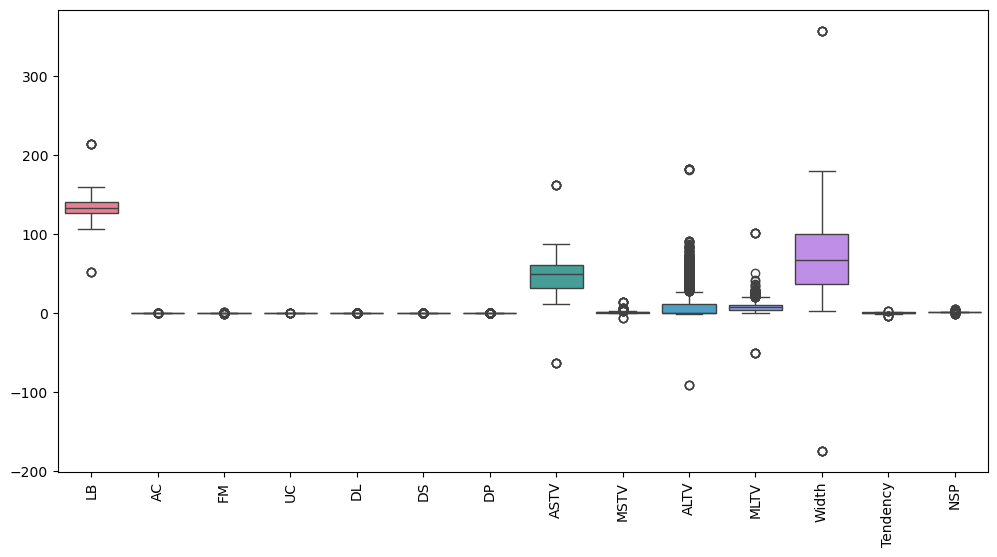

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [6]:
# Replace negative values with NaN for specific columns if negative values are not expected
columns_to_check = ['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
for col in columns_to_check:
    data[col] = data[col].apply(lambda x: x if x >= 0 else np.nan)

# Impute again if needed
data.fillna(data.median(), inplace=True)


In [7]:
# Summary statistics
summary = data.describe().transpose()
summary['IQR'] = summary['75%'] - summary['25%']
print(summary)


           count        mean        std         min        25%         50%  \
LB        2126.0  133.340204  11.214379   51.842487  126.00000  133.000000   
AC        2126.0    0.003264   0.004251    0.000000    0.00000    0.001668   
FM        2126.0    0.011275   0.062290    0.000000    0.00000    0.000000   
UC        2126.0    0.004447   0.003220    0.000000    0.00199    0.004517   
DL        2126.0    0.001939   0.003215    0.000000    0.00000    0.000000   
DS        2126.0    0.000007   0.000117    0.000000    0.00000    0.000000   
DP        2126.0    0.000184   0.000801    0.000000    0.00000    0.000000   
ASTV      2126.0   47.259390  18.039875   11.799846   32.00000   49.000000   
MSTV      2126.0    1.375385   1.134804    0.200000    0.70000    1.200000   
ALTV      2126.0   10.420514  20.860775    0.000000    0.00000    0.000000   
MLTV      2126.0    8.434084   7.170962    0.000000    4.70000    7.400000   
Width     2126.0   70.395387  42.720508 -174.000000   37.00000  

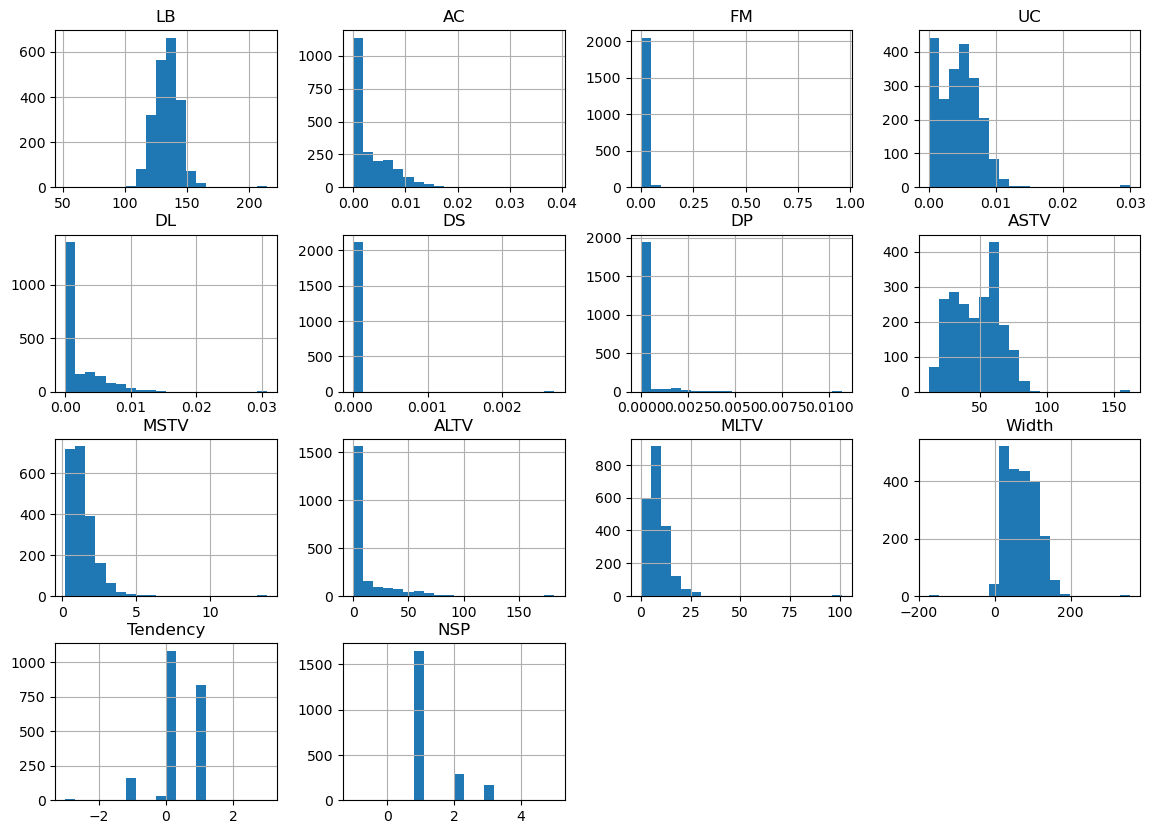

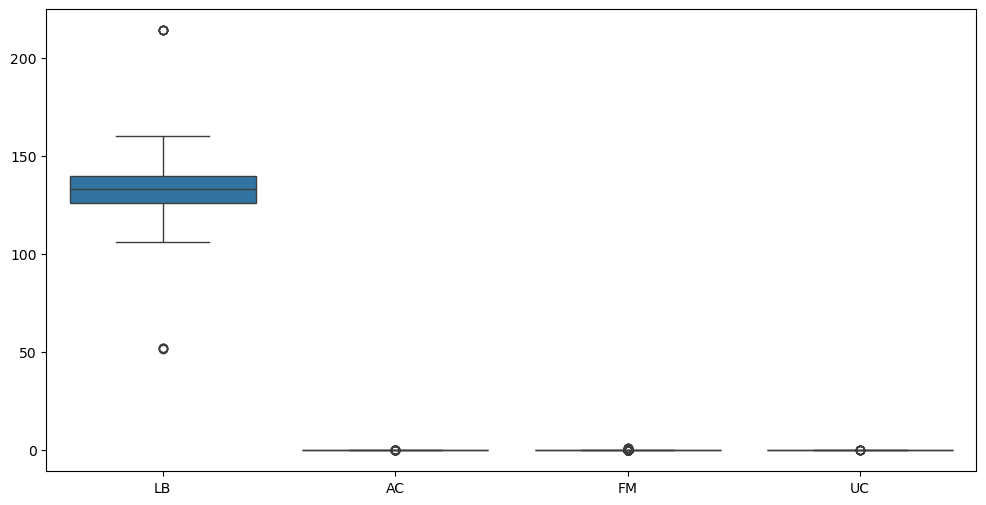

In [8]:
# Histograms for each column
data.hist(bins=20, figsize=(14, 10))
plt.show()

# Boxplot of selected variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['LB', 'AC', 'FM', 'UC']])
plt.show()


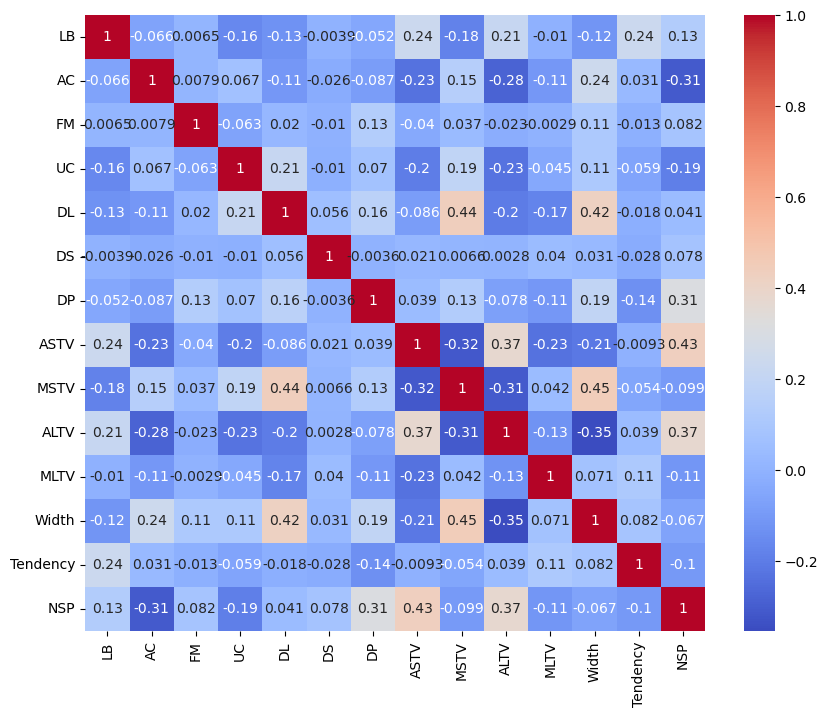

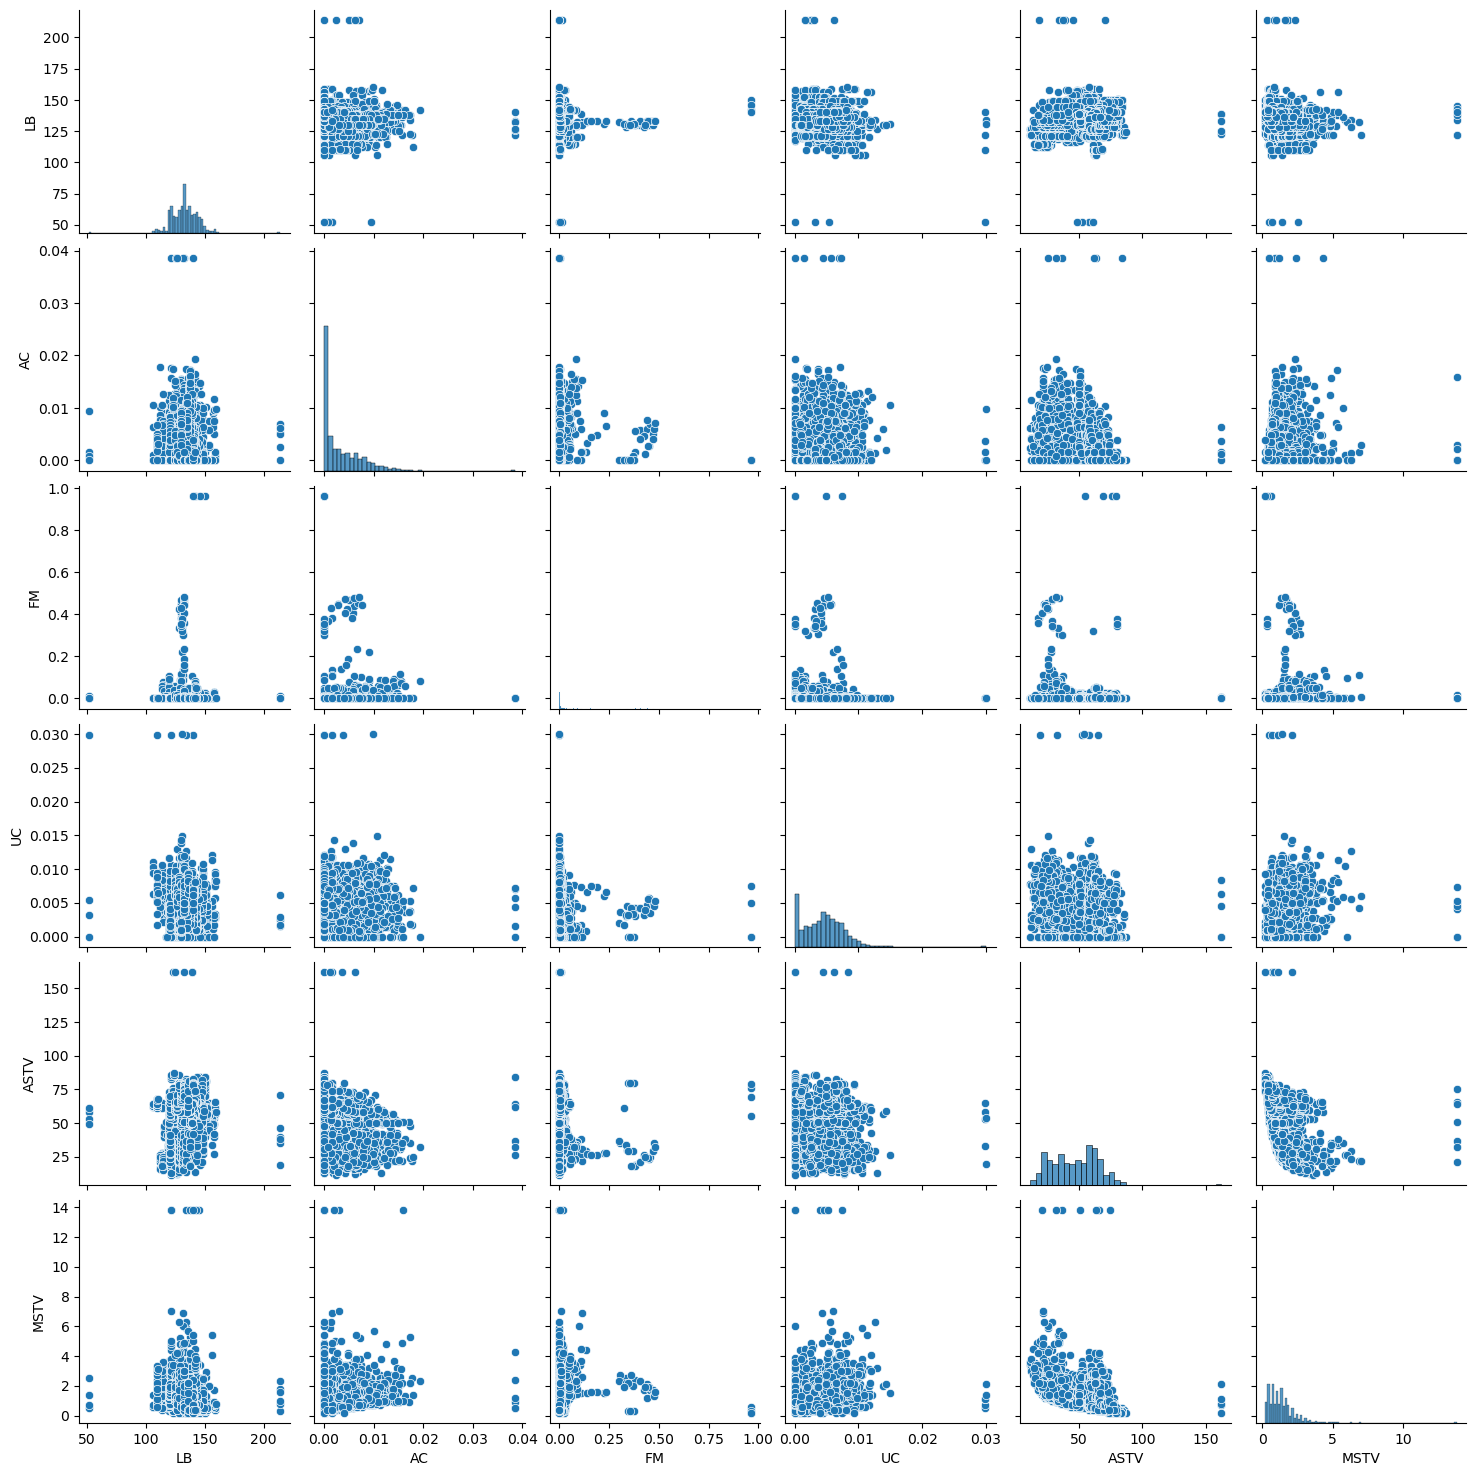

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot
sns.pairplot(data[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV']])
plt.show()


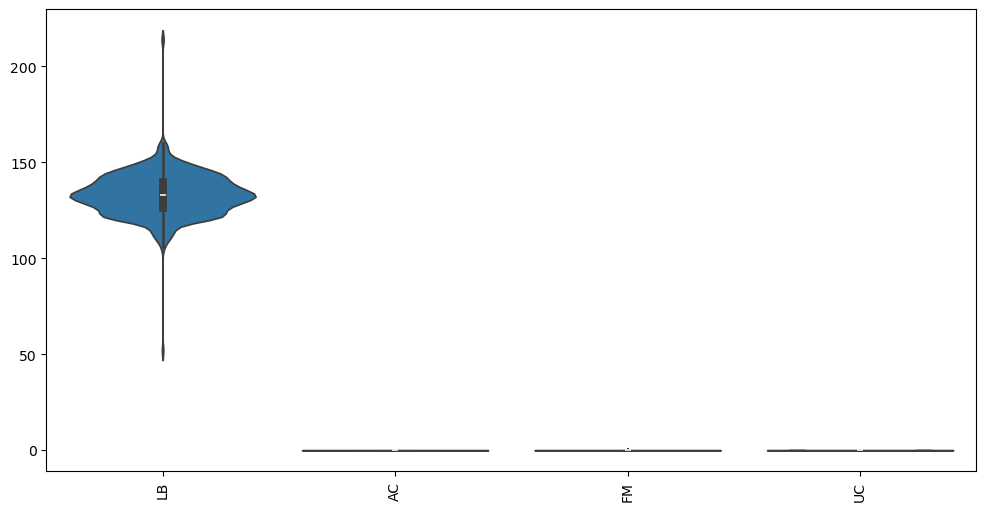

In [10]:
# Violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[['LB', 'AC', 'FM', 'UC']])
plt.xticks(rotation=90)
plt.show()
